In [271]:
import numpy as np
import pandas as pd
import scanpy.api as sc

import gc

In [272]:
import plotly
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.offline.init_notebook_mode(connected=True)

In [273]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
matplotlib.rcParams

/Users/elliemcintosh/miniconda3/envs/py37/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [334]:
matplotlib.rcParams['grid.color'] = 'gray'
matplotlib.rcParams['grid.linewidth'] = 0.4

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300, frameon=True, 
                     vector_friendly=True, color_map=None, format='pdf', 
                     transparent=False, ipython_format='png2x')

In [277]:
plt.style.use(['seaborn-bright', 'dark_background'])

In [7]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [3]:
sc.logging.print_versions()

scanpy==1.3.4 anndata==0.6.13 numpy==1.15.4 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [90]:
#!pip freeze | grep scanpy
%cd ..

/Users/elliemcintosh/Documents/Python/Patient_Data/Gastric_Cancer


In [300]:
%pwd

'/Users/elliemcintosh/Documents/Python/Patient_Data/Gastric_Cancer'

In [11]:
%reset
import gc
gc.collect()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


0

In [305]:
results_file = './Results/EC_allcells2ds_Analysis.h5ad'

In [275]:
na1_adata = sc.read_10x_mtx(
    './Data/EC_10X_001_V1_na_1806/filtered_gene_bc_matrices/GRCh38/', var_names='gene_symbols', cache=True)

ta1_adata = sc.read_10x_mtx(
    './Data/EC_10X_001_V1_ta_1806/filtered_gene_bc_matrices/GRCh38/', var_names='gene_symbols', cache=True)

na2_adata = sc.read_10x_mtx(
    './Data/EC_10X_001_V2_na_1811/filtered_gene_bc_matrices/GRCh38/', var_names='gene_symbols', cache=True)

ta2_adata = sc.read_10x_mtx(
    './Data/EC_10X_001_V2_ta_1811/filtered_gene_bc_matrices/GRCh38/', var_names='gene_symbols', cache=True)

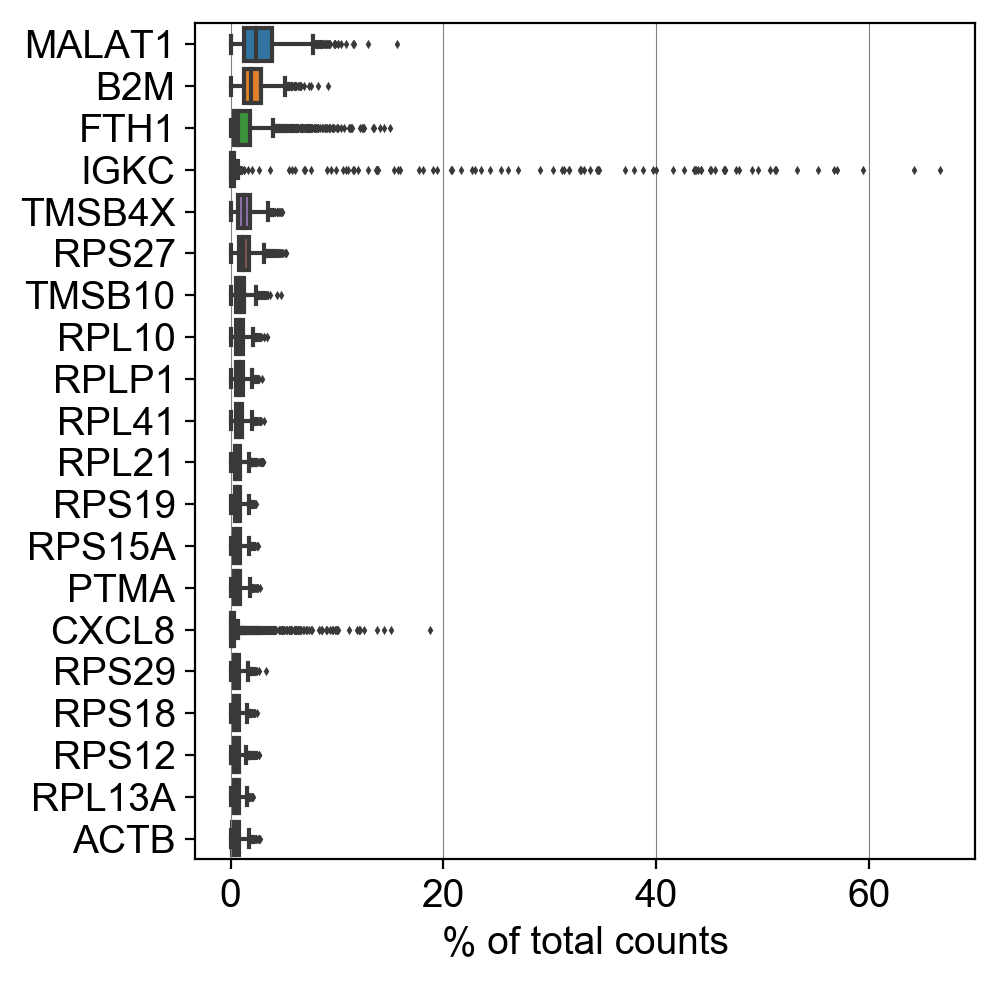

In [276]:
#highly expressed genes
sc.pl.highest_expr_genes(ta2_adata, n_top=20)

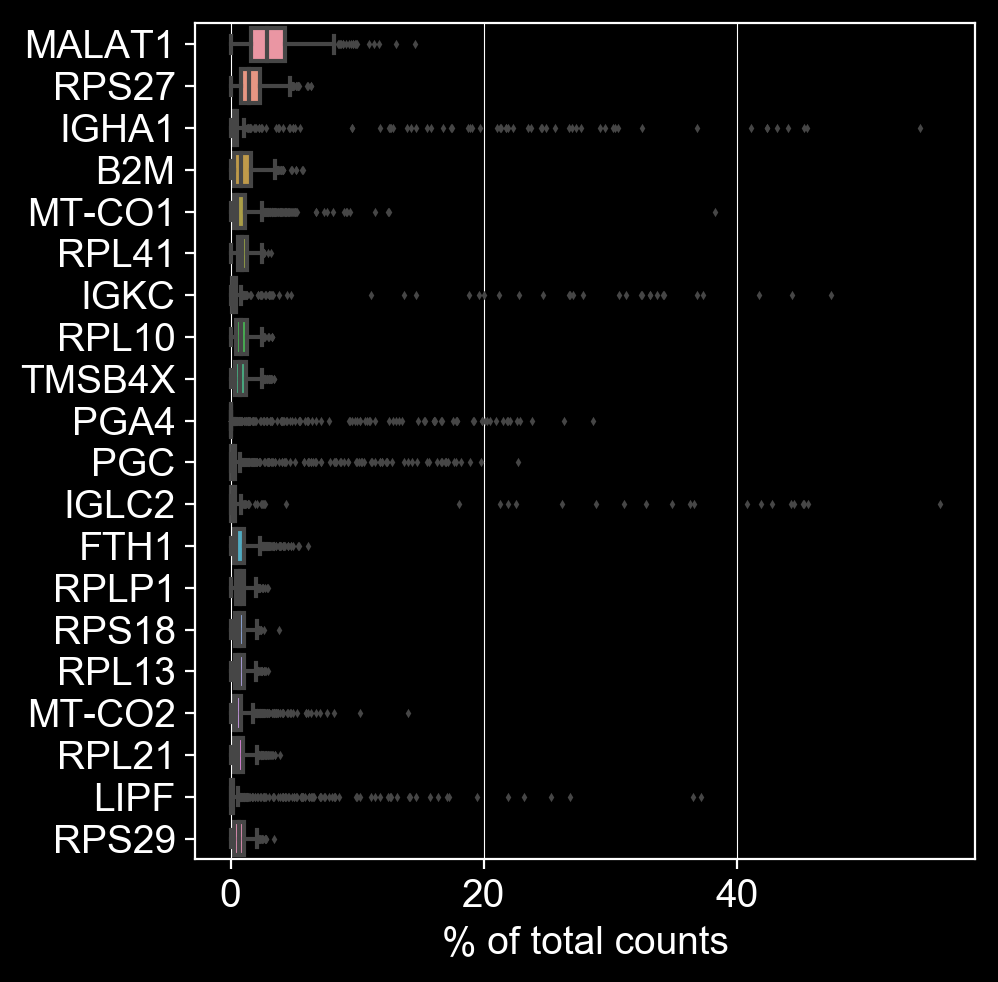

In [16]:
sc.pl.highest_expr_genes(na2_adata, n_top=20)

In [33]:
#number of the common cell bar code ids between the two lane (na1/ta1) and single lane,pooled(na2/ta2) sequencing
print(len(pd.Series(list(set(na2_adata.obs.index).intersection(set(na1_adata.obs.index))))))
print(len(pd.Series(list(set(ta2_adata.obs.index).intersection(set(ta1_adata.obs.index))))))

1146
2101


In [71]:
print(na1_adata.shape[0])
print(na2_adata.shape[0])
print(ta1_adata.shape[0])
print(ta2_adata.shape[0])

1215
1210
2306
2148


In [279]:
na_common_bc = list(set(na1_adata.obs.index).intersection(set(na2_adata.obs.index)))
ta_common_bc = list(set(ta1_adata.obs.index).intersection(set(ta2_adata.obs.index)))

In [82]:
len(na_common_bc)

1146

In [83]:
len(ta_common_bc)

2101

In [88]:
ta2_adata[ta_common_bc].shape

(2101, 33694)

In [280]:
#cocncatenate only the normal and tumor cells which were sequenced twice
adata = na1_adata[na_common_bc].concatenate(na2_adata[na_common_bc], 
                                            ta1_adata[ta_common_bc], 
                                            ta2_adata[ta_common_bc], 
                                            join='outer',
                                            batch_key='batch',
                                            batch_categories=['n1', 'n2', 't1', 't2'])
#NB concatenates with unique indeces
adata

AnnData object with n_obs × n_vars = 6494 × 33694 
    obs: 'batch'
    var: 'gene_ids-n1', 'gene_ids-n2', 'gene_ids-t1', 'gene_ids-t2'

In [284]:
adata.var["mito"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mito"], inplace=True)

In [91]:
adata.var.head()

gene_ids-n1      gene_ids-n2      gene_ids-t1  \
RP11-34P13.3  ENSG00000243485  ENSG00000243485  ENSG00000243485   
FAM138A       ENSG00000237613  ENSG00000237613  ENSG00000237613   
OR4F5         ENSG00000186092  ENSG00000186092  ENSG00000186092   
RP11-34P13.7  ENSG00000238009  ENSG00000238009  ENSG00000238009   
RP11-34P13.8  ENSG00000239945  ENSG00000239945  ENSG00000239945   

                  gene_ids-t2   mito  n_cells_by_counts  mean_counts  \
RP11-34P13.3  ENSG00000243485  False                  0     0.000000   
FAM138A       ENSG00000237613  False                  0     0.000000   
OR4F5         ENSG00000186092  False                  0     0.000000   
RP11-34P13.7  ENSG00000238009  False                  2     0.000308   
RP11-34P13.8  ENSG00000239945  False                  0     0.000000   

              log1p_mean_counts  pct_dropout_by_counts  total_counts  \
RP11-34P13.3           0.000000             100.000000           0.0   
FAM138A                0.000000             100.000000           0.0   
OR4F5                  0.000000             100.000000           0.0   
RP11-34P13.7           0.000308              99.969202           2.0   
RP11-34P13.8           0.000000             100.000000           0.0   

              log1p_total_counts  
RP11-34P13.3            0.000000  
FAM138A                 0.000000  
OR4F5                   0.000000  
RP11-34P13.7            1.098612  
RP11-34P13.8            0.000000

In [281]:
#since genes are the same for all data sets rename and drop:
adata.var.rename(columns={"gene_ids-n1": 'ENSG'}, inplace=True)
adata.var.drop(columns=['gene_ids-t1', 'gene_ids-n2', 'gene_ids-t2'], inplace=True)
adata.var.insert(loc=1, column='Gene', value=adata.var.index, allow_duplicates=False)
adata.var.head()

ENSG          Gene
RP11-34P13.3  ENSG00000243485  RP11-34P13.3
FAM138A       ENSG00000237613       FAM138A
OR4F5         ENSG00000186092         OR4F5
RP11-34P13.7  ENSG00000238009  RP11-34P13.7
RP11-34P13.8  ENSG00000239945  RP11-34P13.8

In [285]:
adata.obs.head()

batch  n_genes_by_counts  log1p_n_genes_by_counts  \
TATCAGGTCCACTCCA-1-n1    n1                357                 5.880533   
CCTTACGCAATGGACG-1-n1    n1                503                 6.222576   
GACTACAGTCTGATTG-1-n1    n1                314                 5.752573   
TAAGTGCAGCGCCTTG-1-n1    n1               1402                 7.246368   
CGAGCCAGTTCCCGAG-1-n1    n1                167                 5.123964   

                       total_counts  log1p_total_counts  \
TATCAGGTCCACTCCA-1-n1         556.0            6.322565   
CCTTACGCAATGGACG-1-n1         892.0            6.794587   
GACTACAGTCTGATTG-1-n1         541.0            6.295266   
TAAGTGCAGCGCCTTG-1-n1        7187.0            8.880168   
CGAGCCAGTTCCCGAG-1-n1         590.0            6.381816   

                       pct_counts_in_top_50_genes  \
TATCAGGTCCACTCCA-1-n1                   39.568345   
CCTTACGCAATGGACG-1-n1                   37.107623   
GACTACAGTCTGATTG-1-n1                   46.950092   
TAAGTGCAGCGCCTTG-1-n1                   65.855016   
CGAGCCAGTTCCCGAG-1-n1                   80.169492   

                       pct_counts_in_top_100_genes  \
TATCAGGTCCACTCCA-1-n1                    53.776978   
CCTTACGCAATGGACG-1-n1                    50.560538   
GACTACAGTCTGATTG-1-n1                    60.443623   
TAAGTGCAGCGCCTTG-1-n1                    72.909420   
CGAGCCAGTTCCCGAG-1-n1                    88.644068   

                       pct_counts_in_top_200_genes  \
TATCAGGTCCACTCCA-1-n1                    71.762590   
CCTTACGCAATGGACG-1-n1                    66.031390   
GACTACAGTCTGATTG-1-n1                    78.927911   
TAAGTGCAGCGCCTTG-1-n1                    79.379435   
CGAGCCAGTTCCCGAG-1-n1                   100.000000   

                       pct_counts_in_top_500_genes  total_counts_mito  \
TATCAGGTCCACTCCA-1-n1                   100.000000               40.0   
CCTTACGCAATGGACG-1-n1                    99.663677               18.0   
GACTACAGTCTGATTG-1-n1                   100.000000               40.0   
TAAGTGCAGCGCCTTG-1-n1                    87.449562              117.0   
CGAGCCAGTTCCCGAG-1-n1                   100.000000                1.0   

                       log1p_total_counts_mito  pct_counts_mito  
TATCAGGTCCACTCCA-1-n1                 3.713572         7.194245  
CCTTACGCAATGGACG-1-n1                 2.944439         2.017937  
GACTACAGTCTGATTG-1-n1                 3.713572         7.393715  
TAAGTGCAGCGCCTTG-1-n1                 4.770685         1.627939  
CGAGCCAGTTCCCGAG-1-n1                 0.693147         0.169492

saving figure to file ./figures/violin.pdf


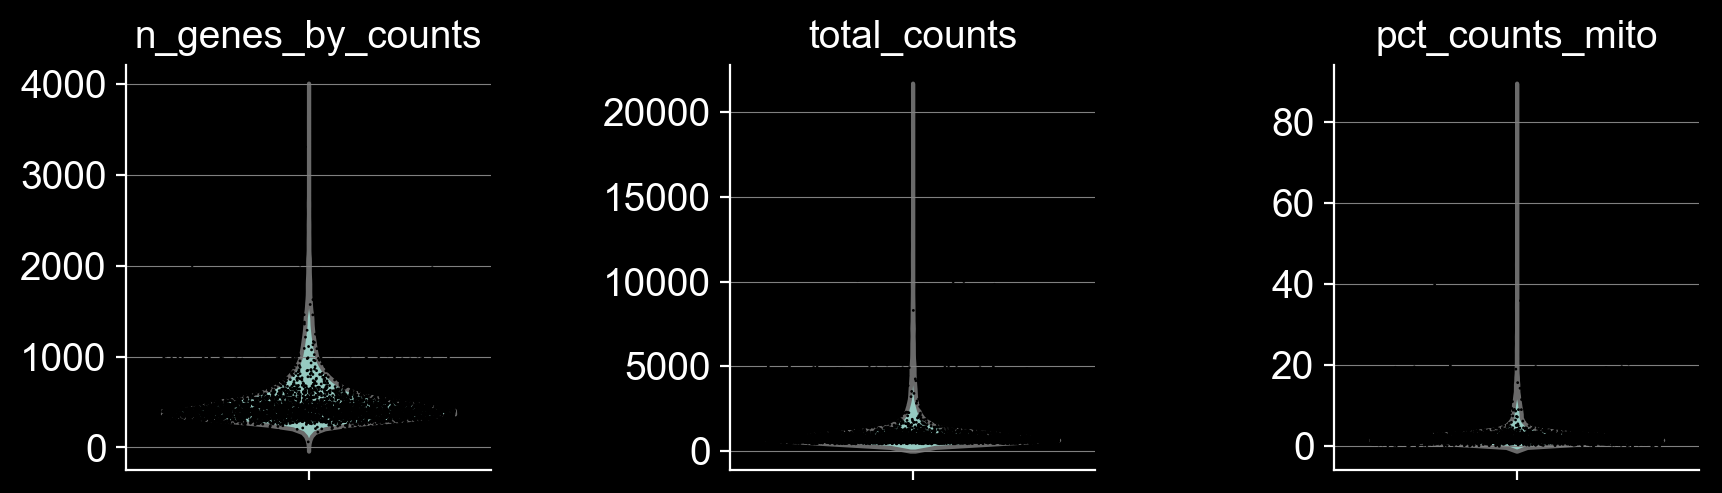

In [94]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts', 'pct_counts_mito'], jitter=0.4, multi_panel=True, save=True)

saving figure to file ./figures/scatter.pdf


<Figure size 1000x1000 with 0 Axes>

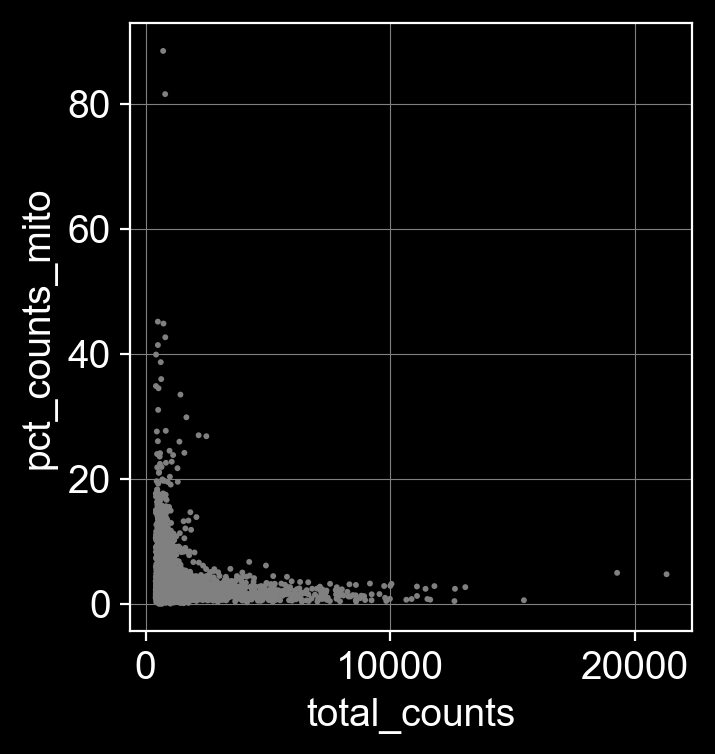

saving figure to file ./figures/scatter.pdf


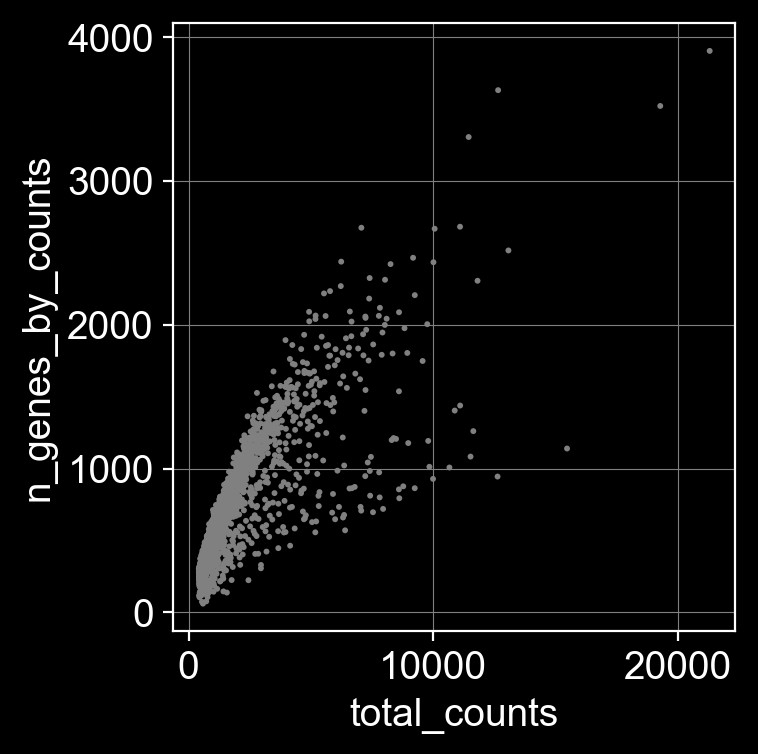

In [95]:
plt.figure(figsize=(10,10))
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mito', size=18, save=True)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', size=18, save=True)

In [286]:
#QC cells (Marioni): filter library size, number of expressed genes and percent mito genes outliers
#Remove cells with log-library sizes that are more than 3 median absolute deviations below/above
#the median log-library size and cells for which the log-transformed number of expressed genes is 
#3 MADs below/above the median. Use of log-transformation improves resolution at small values 
median_log_libsize     = np.median(adata.obs['log1p_total_counts'])
median_log_geneexpr    = np.median(adata.obs['log1p_n_genes_by_counts'])

median_pct_counts_mito = np.median(adata.obs['pct_counts_mito'])

In [287]:
libsize_filter  = (adata.obs.log1p_total_counts >= median_log_libsize - 3*median_log_libsize) & (adata.obs.log1p_total_counts <= median_log_libsize + 3*median_log_libsize)
    
geneexpr_filter = (adata.obs.log1p_n_genes_by_counts >= median_log_geneexpr - 3*median_log_geneexpr) & (adata.obs.log1p_n_genes_by_counts <= median_log_geneexpr + 3*median_log_geneexpr)
     
mito_filter     = adata.obs.pct_counts_mito <= median_pct_counts_mito + 3*median_pct_counts_mito

#filtered cells
adata[libsize_filter & geneexpr_filter & mito_filter].shape

(6141, 33694)

In [288]:
adata = adata[libsize_filter & geneexpr_filter & mito_filter]
adata

View of AnnData object with n_obs × n_vars = 6141 × 33694 
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'ENSG', 'Gene', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [289]:
#QC Genes
nozero_expr_genes = adata.var.n_cells_by_counts > 0
adata = adata[:, nozero_expr_genes]

sc.pp.calculate_qc_metrics(adata, qc_vars=["mito"], inplace=True)
adata.var.head()

ENSG           Gene   mito  n_cells_by_counts  \
RP11-34P13.7   ENSG00000238009   RP11-34P13.7  False                  2   
FO538757.2     ENSG00000279457     FO538757.2  False                232   
AP006222.2     ENSG00000228463     AP006222.2  False                 68   
RP4-669L17.10  ENSG00000237094  RP4-669L17.10  False                 11   
RP11-206L10.4  ENSG00000229905  RP11-206L10.4  False                  2   

               mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
RP11-34P13.7      0.000326           0.000326              99.967432   
FO538757.2        0.038919           0.038181              96.222114   
AP006222.2        0.011399           0.011334              98.892688   
RP4-669L17.10     0.001791           0.001790              99.820876   
RP11-206L10.4     0.000326           0.000326              99.967432   

               total_counts  log1p_total_counts  
RP11-34P13.7            2.0            1.098612  
FO538757.2            239.0            5.480639  
AP006222.2             70.0            4.262680  
RP4-669L17.10          11.0            2.484907  
RP11-206L10.4           2.0            1.098612

In [290]:
#histogram plot of log average count for all expressed genes in the data set
data = [go.Histogram(x=np.log10(adata.var.mean_counts),
                     name='log-average counts',
                     xbins=dict(start=-4.0,
                               end=2,
                               size=0.05)
                    )]

plotly.offline.iplot(dict(data = data, 
                          layout = go.Layout(title ='Histogram of log-average counts for all genes')))

/Users/elliemcintosh/miniconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



In [291]:
#NB: Allowing lower treshold will increase the number of Highly Variable Genes, looking for about 2000 hvg
low_abundance_gene_filter = np.log10(adata.var.mean_counts) >= -2.75
#low_abundance_gene_filter = np.log10(adata.var.mean_counts.add(pd.Series([1]*adata.shape[1], index=adata.var.mean_counts.index))) >= -1.95
adata[:,low_abundance_gene_filter].shape

/Users/elliemcintosh/miniconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



(6141, 13371)

In [292]:
adata = adata[:,low_abundance_gene_filter]
adata

View of AnnData object with n_obs × n_vars = 6141 × 13371 
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'ENSG', 'Gene', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [293]:
#Set the .raw attribute of AnnData object to the logarithmized raw gene expression for later use in differential testing and visualizations of gene expression
adata.raw = sc.pp.log1p(adata, copy=True)

In [294]:
#Per-cell normalize the data matrix X; normalized data matrix to be considered 
#for visualization and differential testing. NB Seurat uses raw data!
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [295]:
#logarithmized data first
sc.pp.log1p(adata)
#Annotate highly variable genes: adata.var.highly_variable
sc.pp.highly_variable_genes(adata, 
                            n_bins=20,
                            min_mean=0.0125, 
                            max_mean=3, 
                            min_disp=0.5,
                            inplace=True)

In [ ]:
#NB: Use sc.pp.filter_genes_dispersion only for trying out parameters only use only the data matrix X, 
#the annotation is returned as `np.recarray` with gene_subset, means, dispersions, dispersion_norm 
#with plt.style.context('bmh'):
    #filter_result = sc.pp.filter_genes_dispersion(
     #adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [296]:
#number of highly variable genes
sum(adata.var.highly_variable)

2037

In [297]:
#filter higly variable genes
adata = adata[:, adata.var.highly_variable]

In [298]:
adata

View of AnnData object with n_obs × n_vars = 6141 × 2037 
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_counts'
    var: 'ENSG', 'Gene', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [303]:
#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mito'])

#Scale the data to unit variance; Consider restricting std to 10 or less????????????
sc.pp.scale(adata)

In [304]:
#save the filtered adata from normal and tumor cells
adata.write(results_file)

In [306]:
#compute PCA and make scatter plot
sc.tl.pca(adata, svd_solver='arpack')

saving figure to file ./figures/pca.pdf


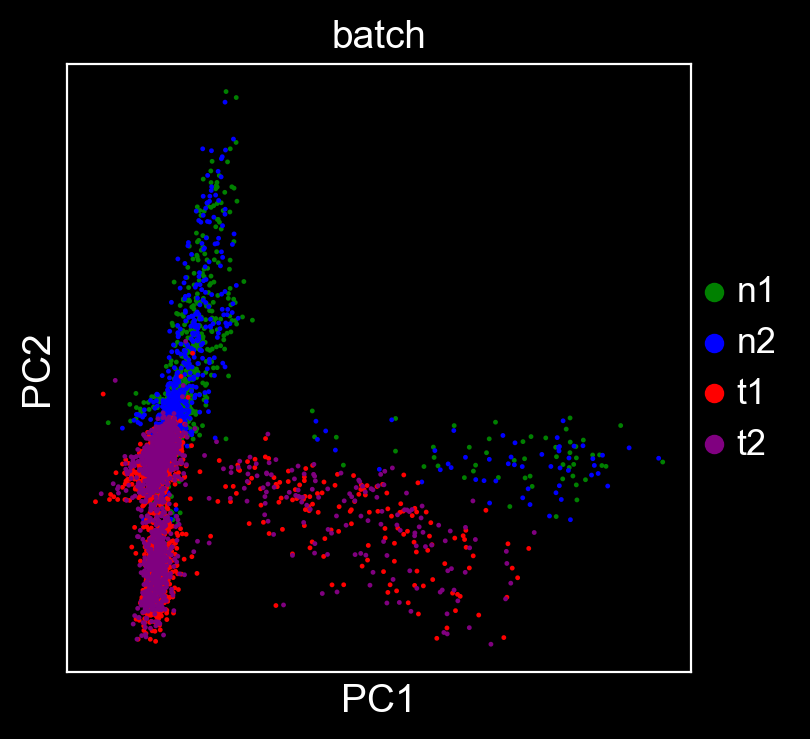

In [135]:
sc.pl.pca(adata, color='batch',use_raw=None, size=12, 
          palette=['green','blue','red','purple'], 
          save=True)

saving figure to file ./figures/pca_variance_ratio.pdf


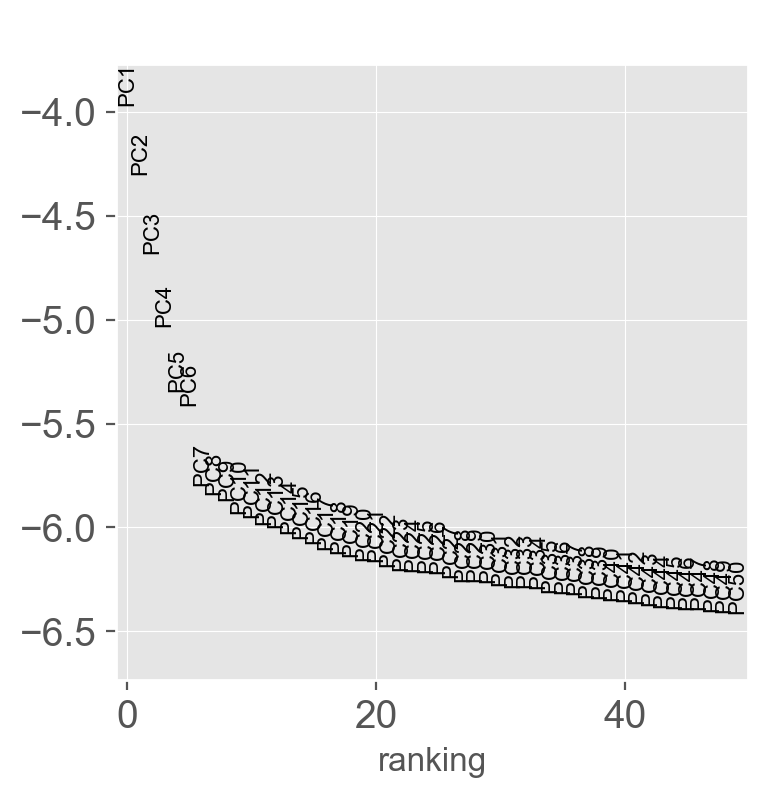

In [137]:
#inspect the contribution of single PCs to total variance
with plt.style.context('ggplot'):
    sc.pl.pca_variance_ratio(adata, n_pcs=80, log=True, show=True, save=True)

In [307]:
#computing the neighborhood graph of cells using PCA representation of data matrix
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

/Users/elliemcintosh/miniconda3/envs/py37/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning:

invalid value encountered in sqrt



In [308]:
#visualize using UMAP
sc.tl.umap(adata)

saving figure to file ./figures/umap.pdf


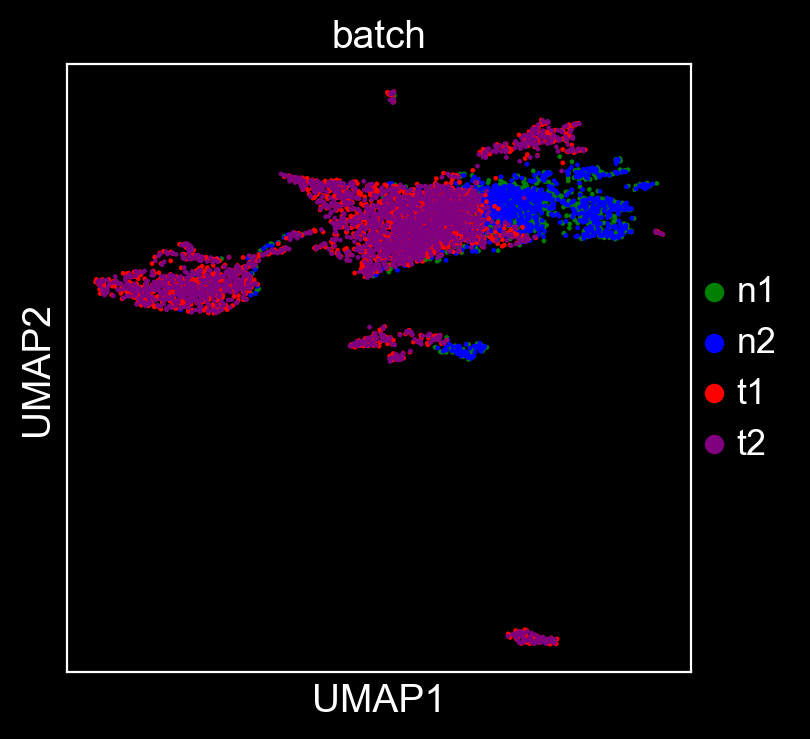

In [148]:
sc.pl.umap(adata, color=['batch'], size=12, palette=['green','blue','red','purple'], save=True)

In [309]:
#Louvain graph-clustering of the nrighborhood graph of cells, previously computed
sc.tl.louvain(adata)

saving figure to file ./figures/umap.pdf


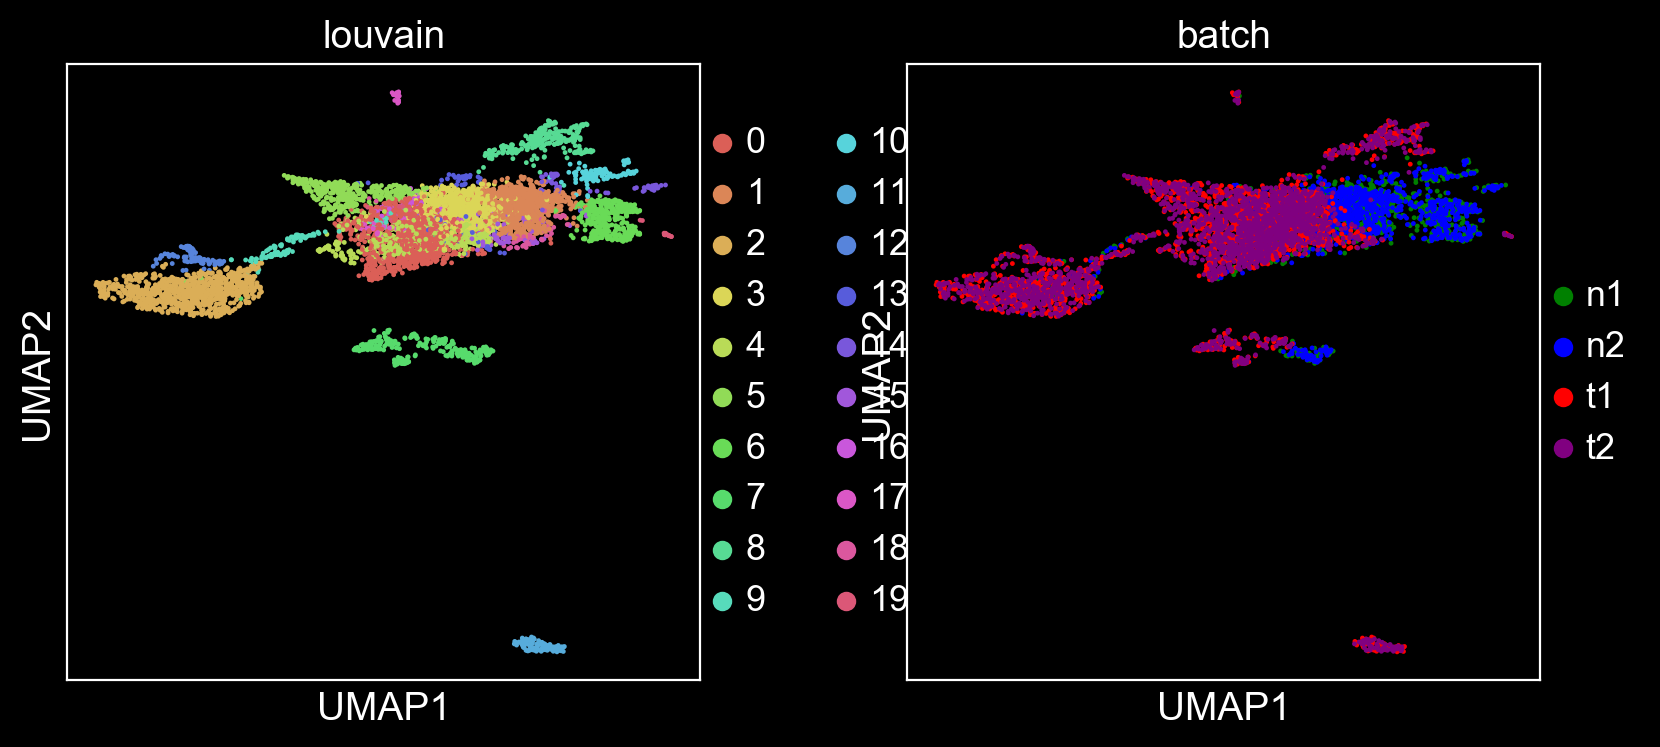

In [149]:
sc.pl.umap(adata, color = ['louvain', 'batch'], size=12, save = True)

In [340]:
adata.write(results_file)

saving figure to file ./figures/umap.pdf


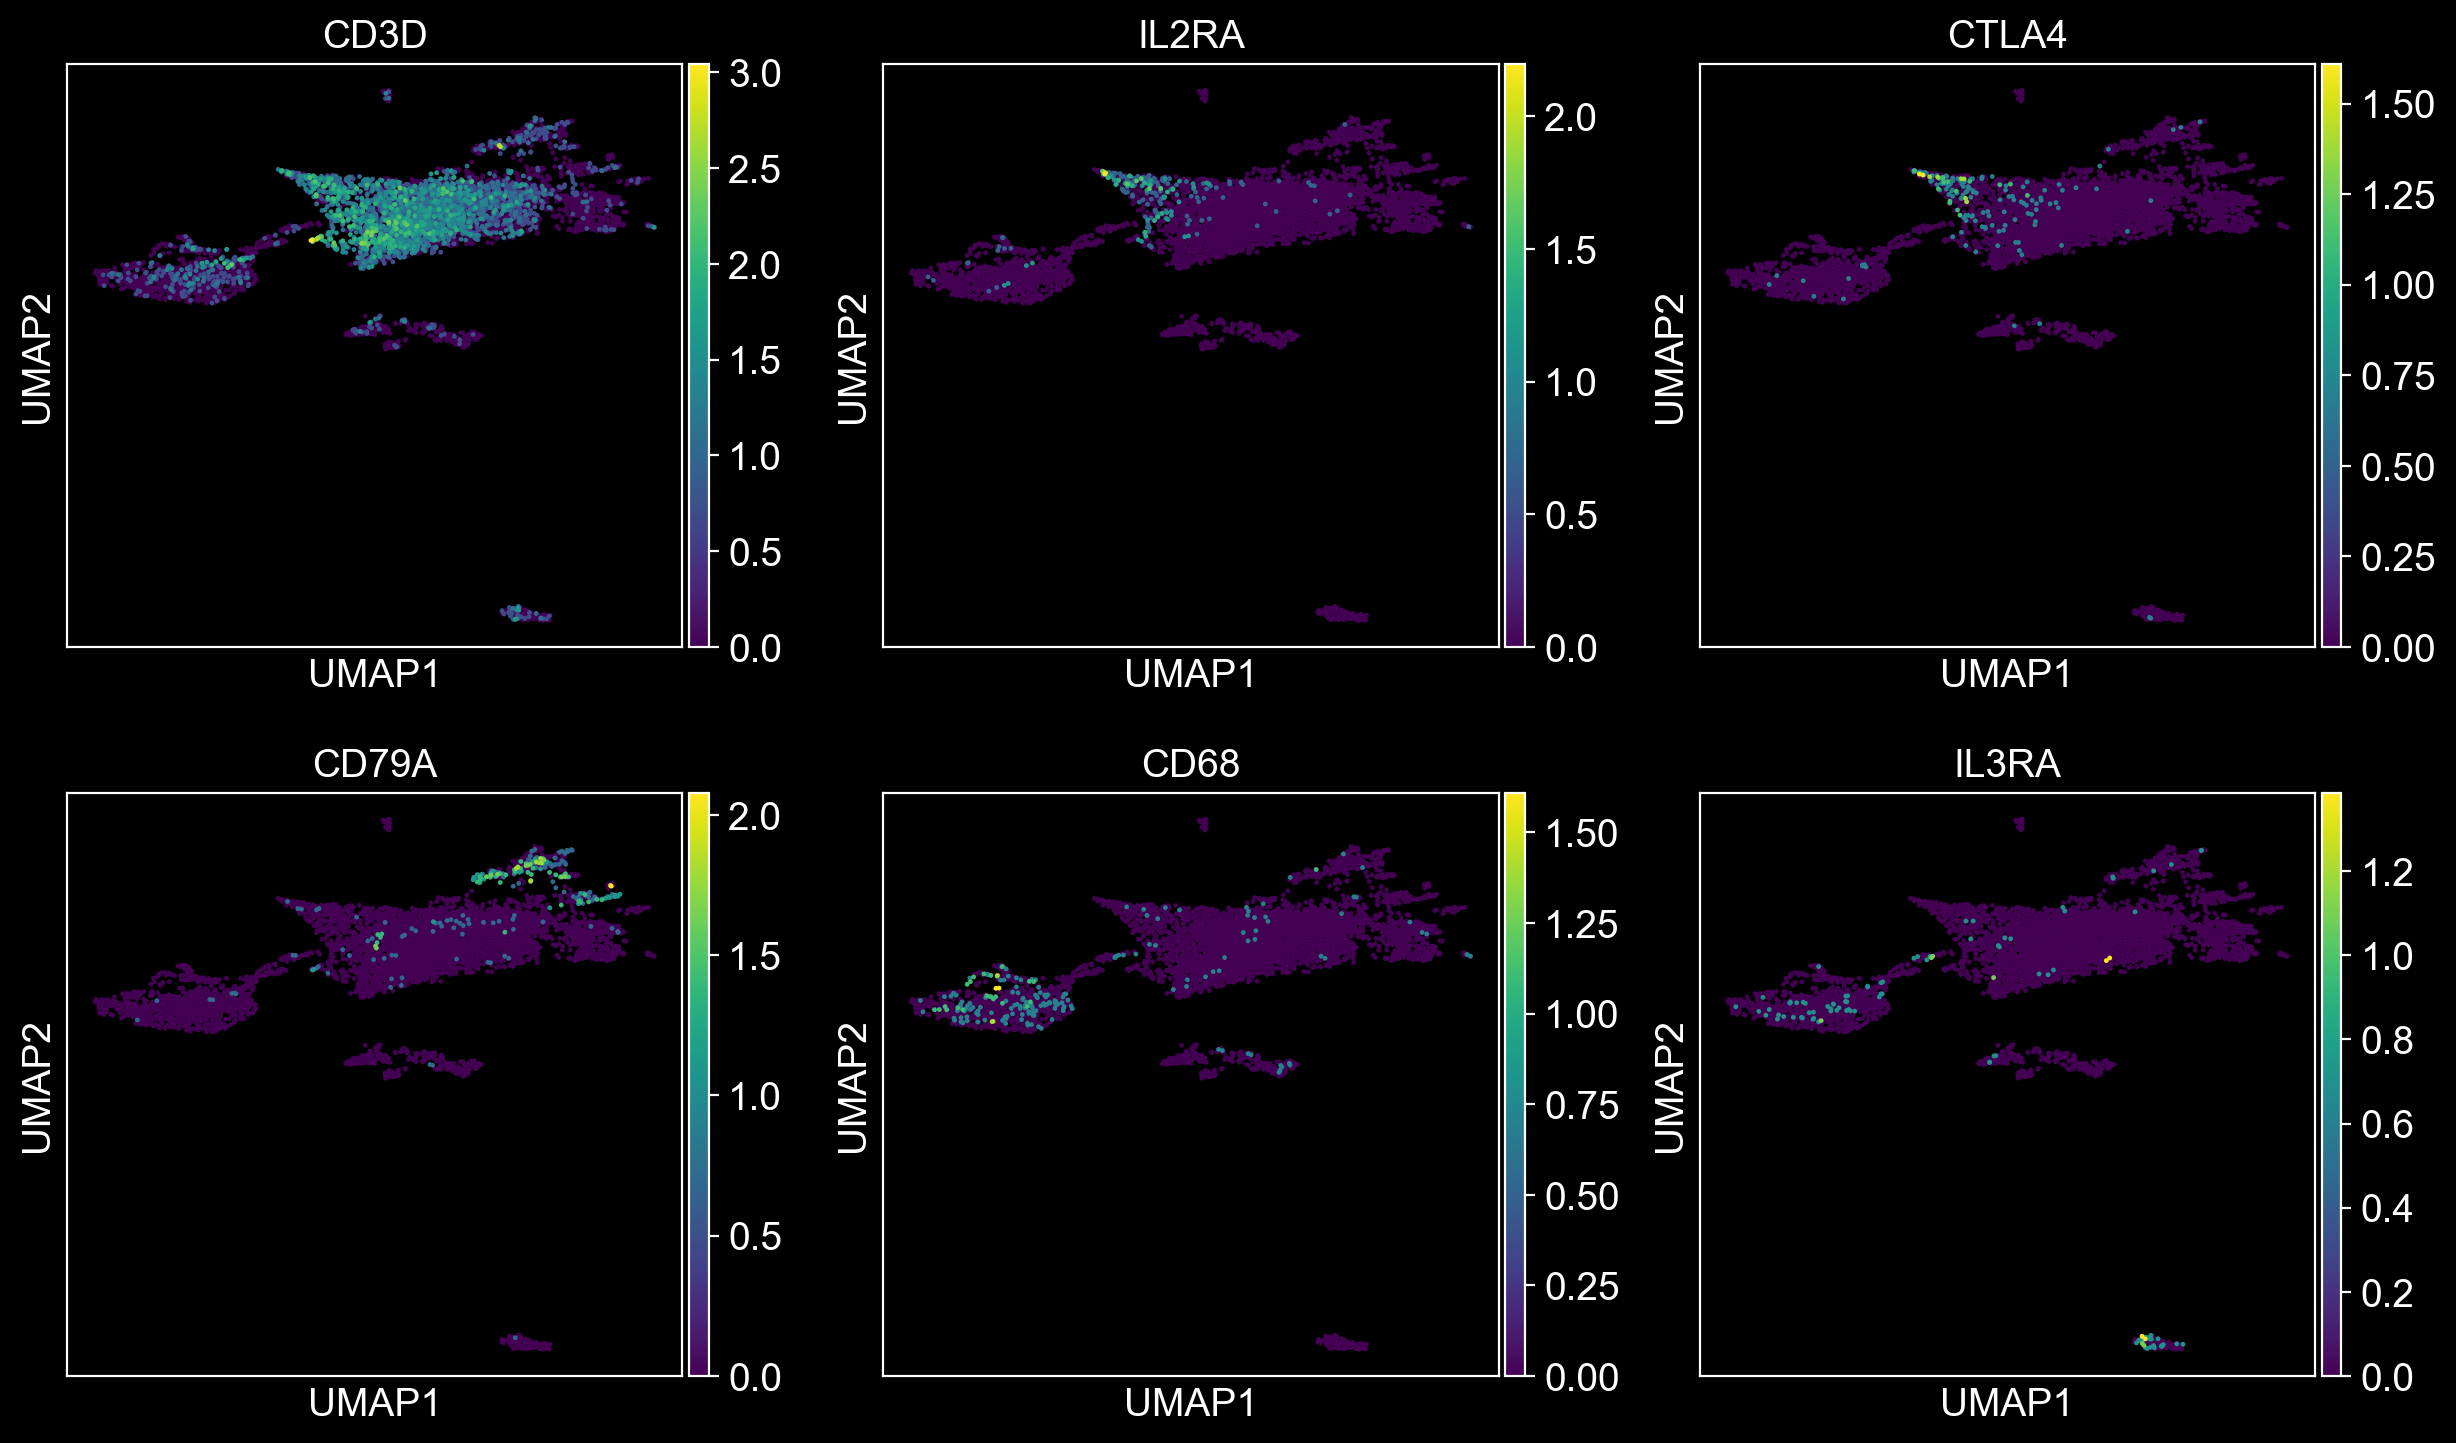

In [153]:
sc.pl.umap(adata,
           ncols= 3, size=12, save=True,
           color=['CD3D', 'IL2RA', 'CTLA4', # Tcells, Treg, exostd Tcells
                  'CD79A', 'CD68','IL3RA'])  # Bcells, Macrophages, pDendritic Cells

ranking genes
    finished (0:00:01.73) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids
saving figure to file ./figures/rank_genes_groups_louvain.pdf


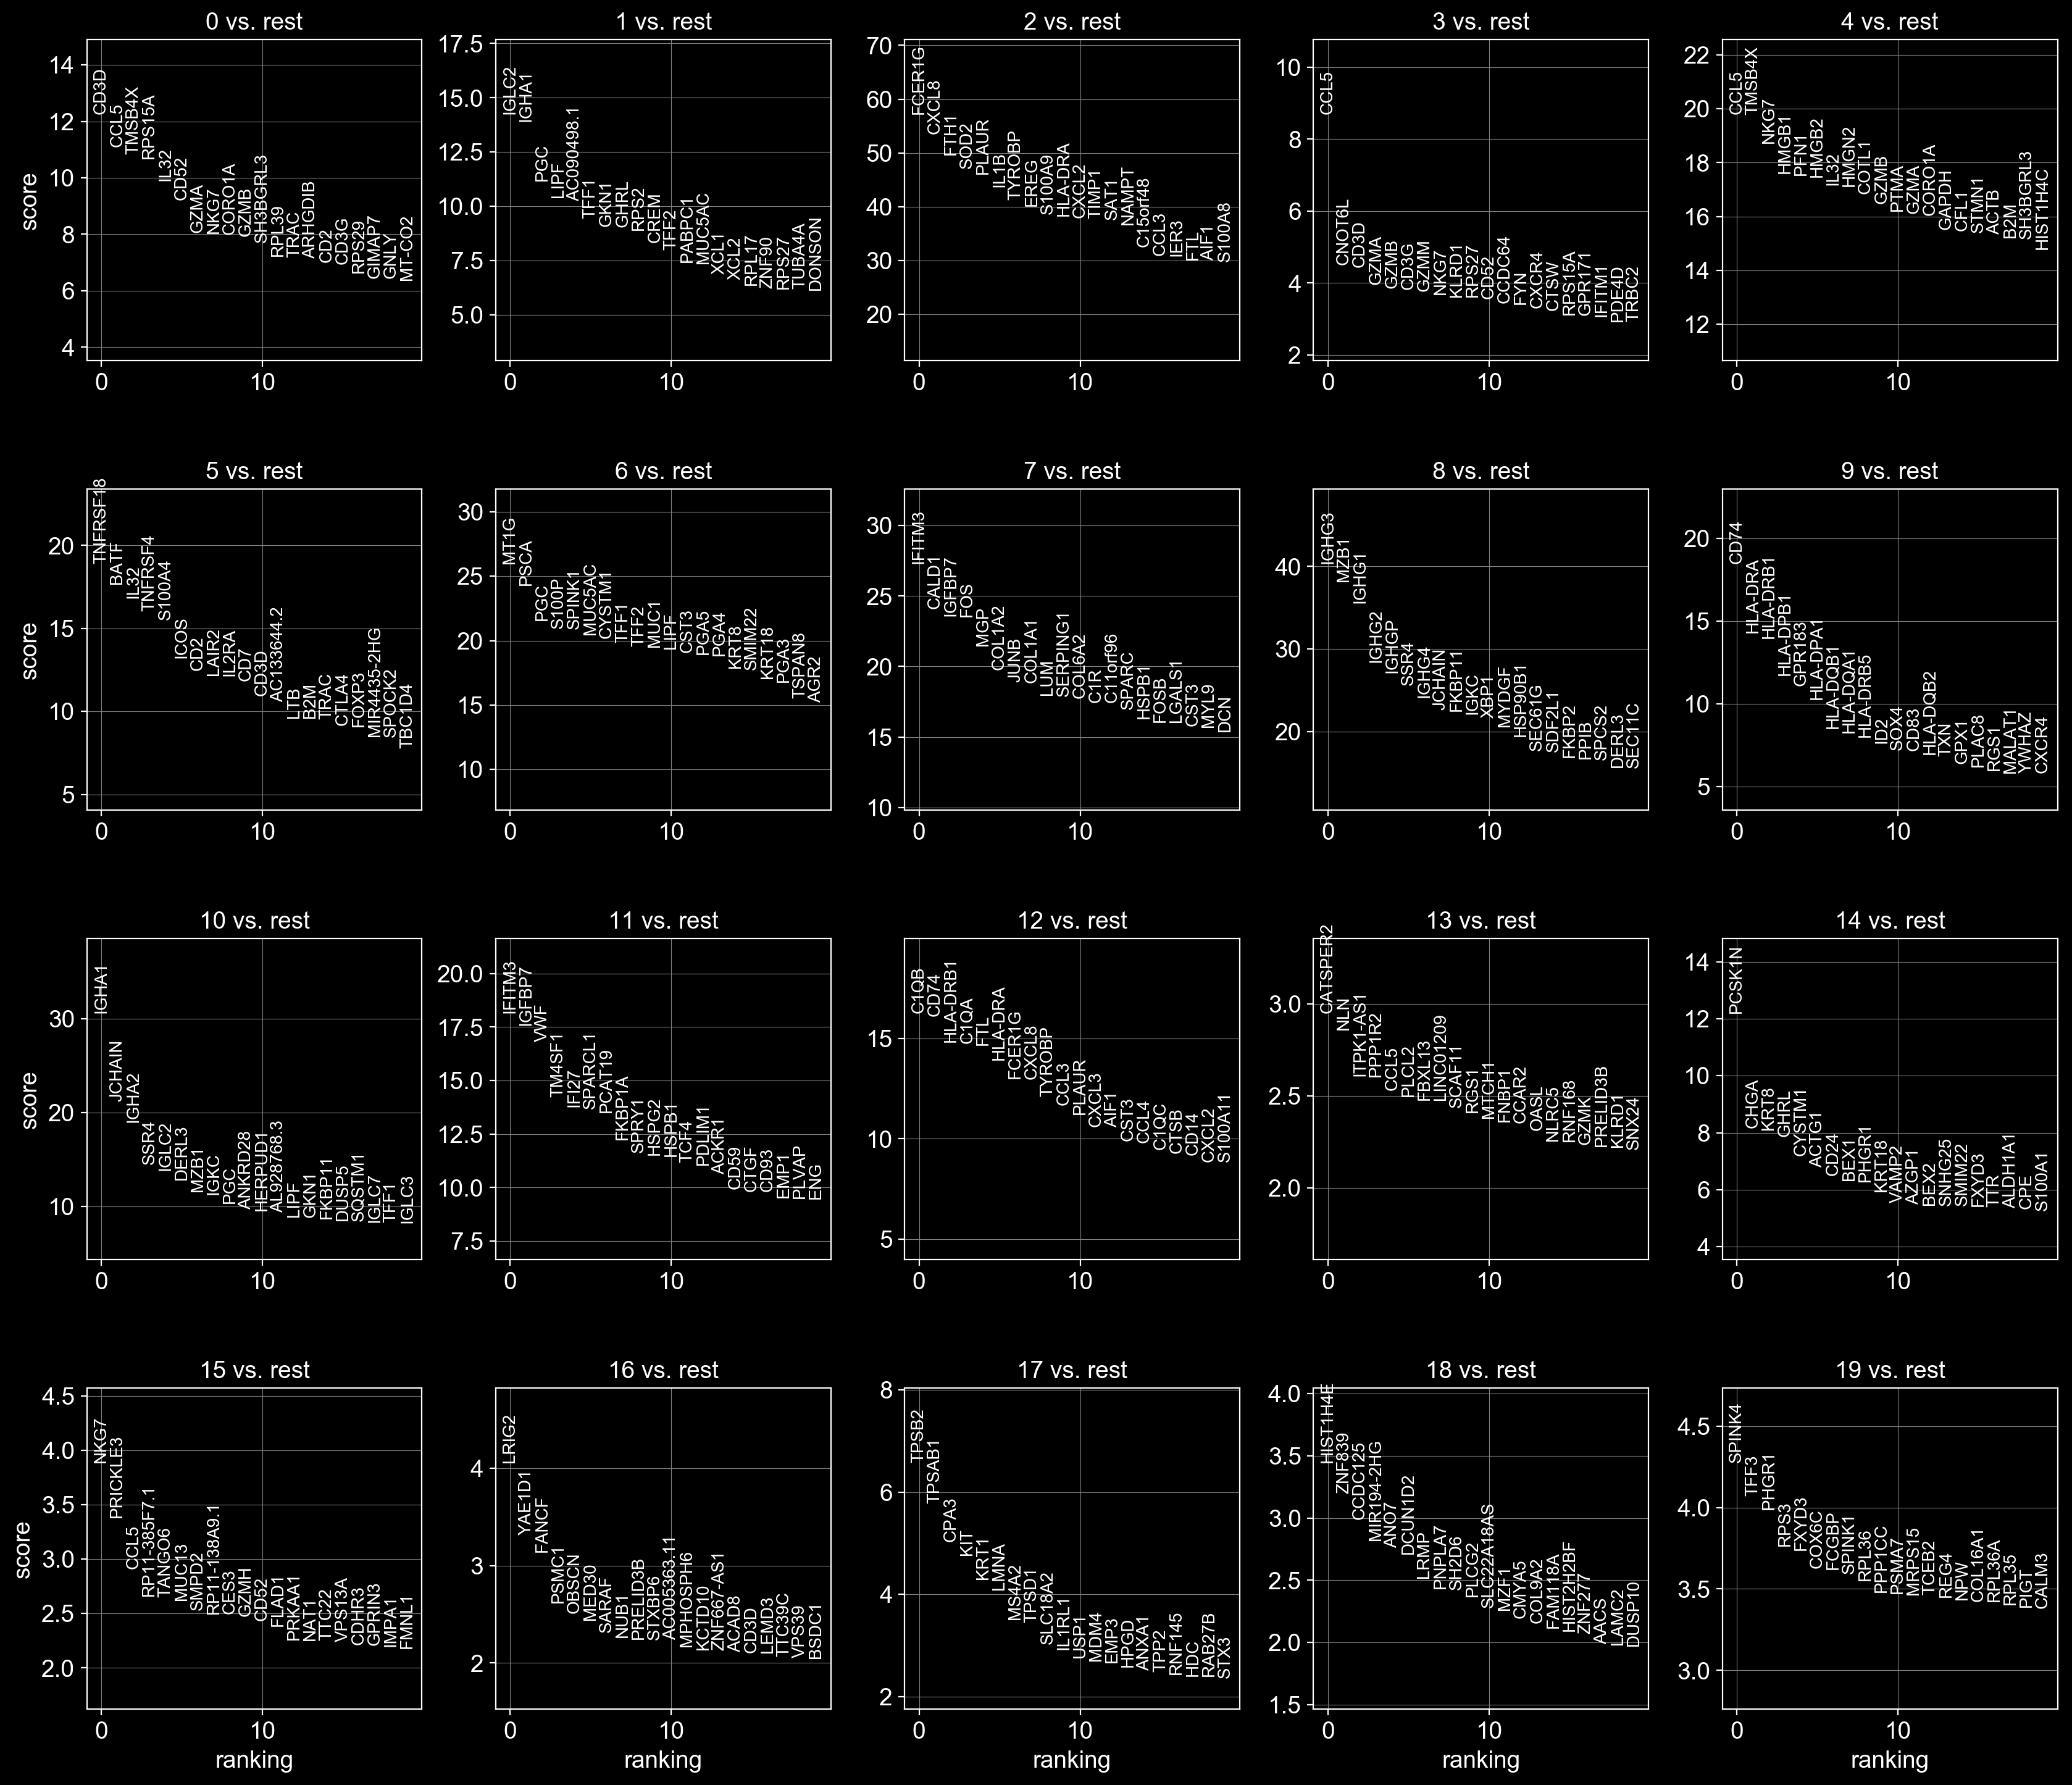

In [154]:
#Finding marker genes - t test or wilcoxon or logreg on highly differential genes in each cluster using raw counts
sc.tl.rank_genes_groups(adata, 'louvain') #method ='wilcoxon', 'logreg'
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, fontsize = 10, save=True, ncols=5)
adata.write(results_file)

ranking genes
    finished (0:00:00.08) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


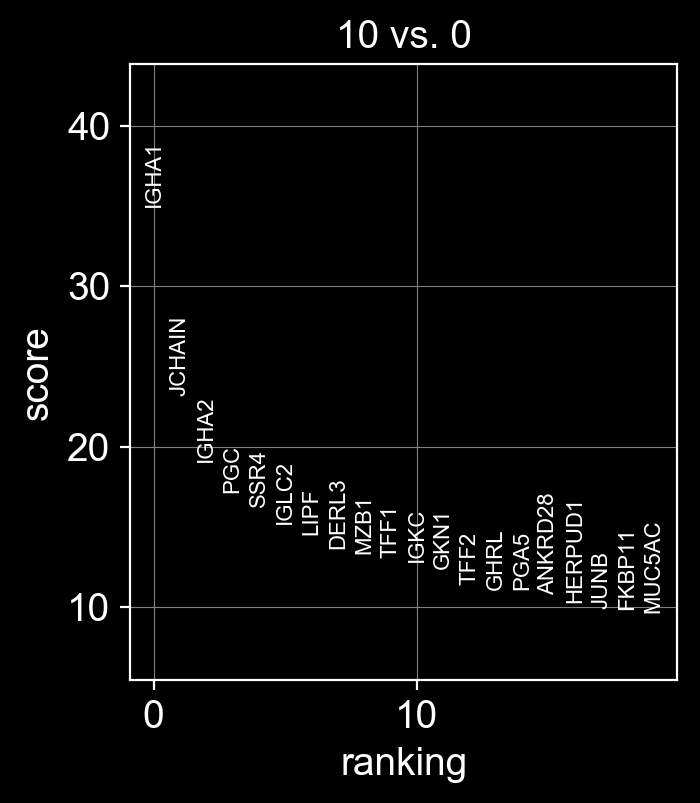

In [155]:
#Compare chosen clusters
sc.tl.rank_genes_groups(adata, 'louvain', groups=['10'], reference='0') #default reference='rest'
sc.pl.rank_genes_groups(adata, groups=['10'], n_genes=20)

In [156]:
#print out a table with the most variable genes in clusters
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(20) #.to_csv('NormalTumor2Sets_20MarkerGenes.csv)

10_n       10_s
0     IGHA1  34.964657
1    JCHAIN  23.183762
2     IGHA2  19.075766
3       PGC  17.112185
4      SSR4  16.243063
5     IGLC2  15.194963
6      LIPF  14.497069
7     DERL3  13.655245
8      MZB1  13.328036
9      TFF1  13.088374
10     IGKC  12.786557
11     GKN1  12.397165
12     TFF2  11.378325
13     GHRL  11.094076
14     PGA5  11.063526
15  ANKRD28  10.773516
16  HERPUD1  10.276711
17     JUNB   9.899075
18   FKBP11   9.807776
19   MUC5AC   9.647491

In [47]:
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(20).to_csv('NormalTumor2Sets_20MarkerGenes.csv')

saving figure to file ./figures/rank_genes_groups_louvain_10.pdf


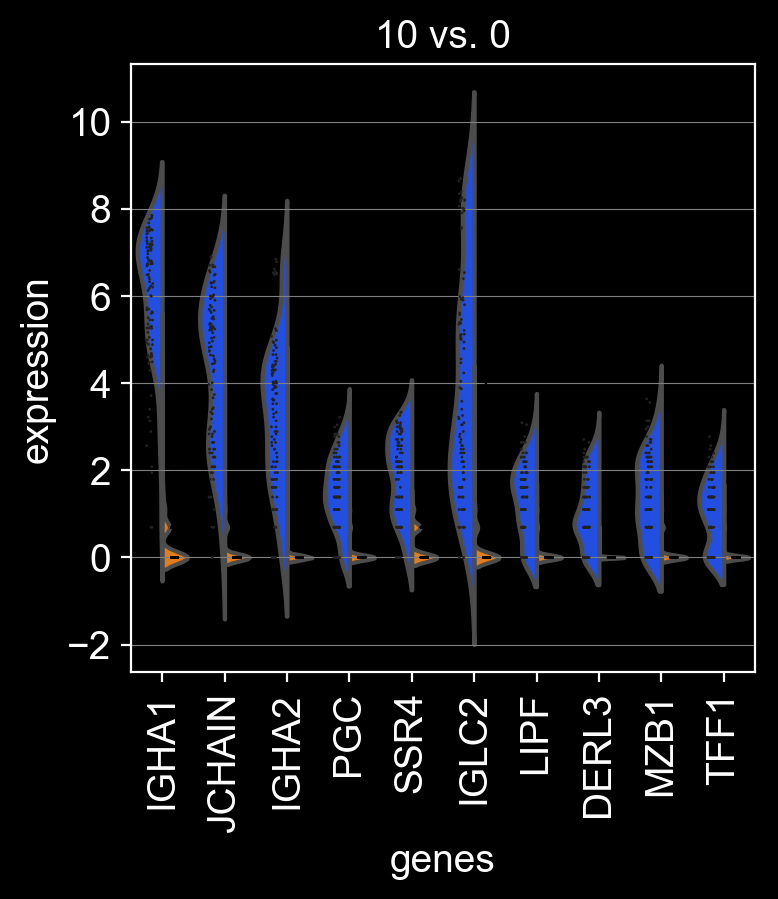

In [157]:
sc.pl.rank_genes_groups_violin(adata, groups='10', n_genes=10, save=True)

saving figure to file ./figures/violin.pdf


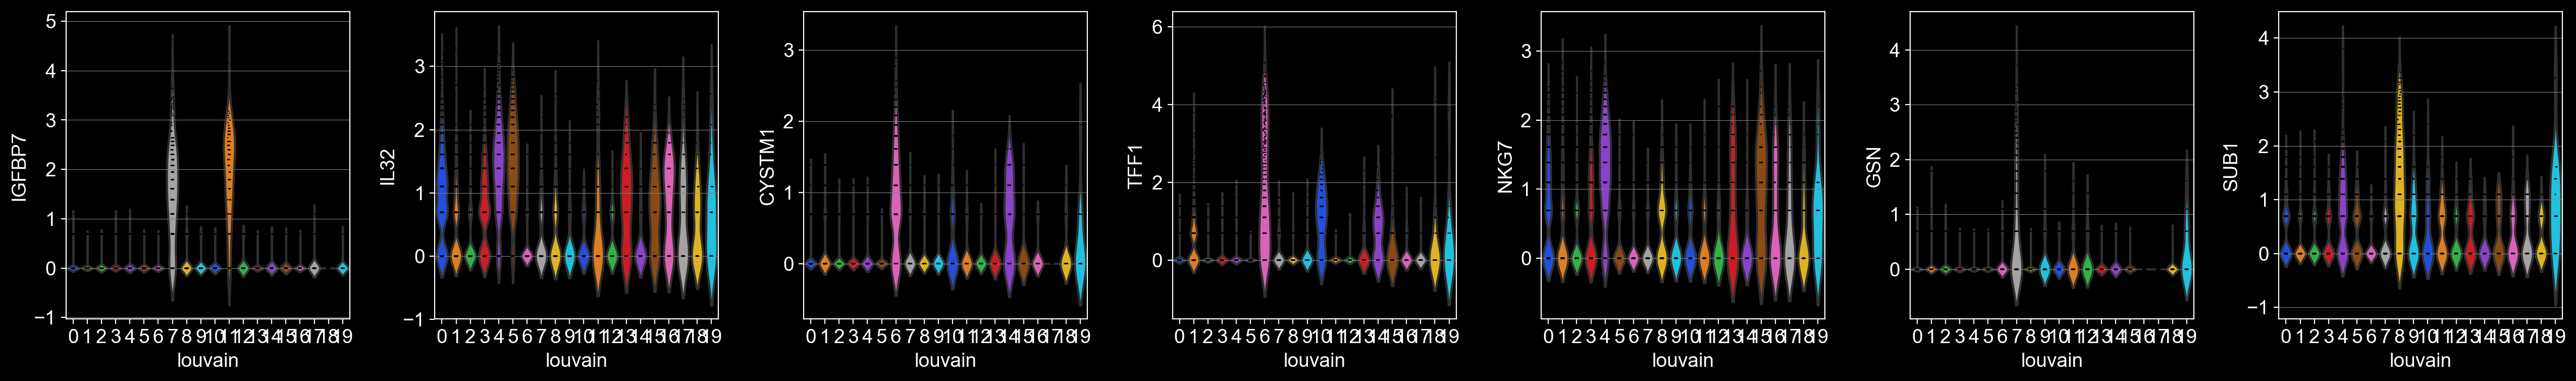

In [158]:
sc.pl.violin(adata, ['IGFBP7', 'IL32', 'CYSTM1', 
                     'TFF1', 'NKG7', 'GSN','SUB1'],
             groupby='louvain',
             save=True)

In [178]:
double_lane_data = (adata.obs.batch == 'n1') | (adata.obs.batch =='t1')
single_lane_data = (adata.obs.batch == 'n2') | (adata.obs.batch =='t2')
normal_cell_data = (adata.obs.batch == 'n1') | (adata.obs.batch =='n2')
tumor_cell_data  = (adata.obs.batch == 't1') | (adata.obs.batch =='t2')

In [179]:
print(sum(double_lane_data))
print(sum(single_lane_data))
print(sum(normal_cell_data))
print(sum( tumor_cell_data))

3083
3058
1960
4181


In [180]:
#Ploting subsets of the data: 
#double lane data set - n1 and t1, and single lane data set - n2 and t2
#normal cells, tumor cells
dl_adata = adata[double_lane_data]
sl_adata = adata[single_lane_data]
nc_adata = adata[normal_cell_data]
tc_adata = adata[ tumor_cell_data]

In [176]:
sl_adata

AnnData object with n_obs × n_vars = 3058 × 2037 
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_counts', 'louvain'
    var: 'ENSG', 'Gene', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'batch_colors', 'neighbors', 'louvain', 'louvain_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

saving figure to file ./figures/umap.pdf


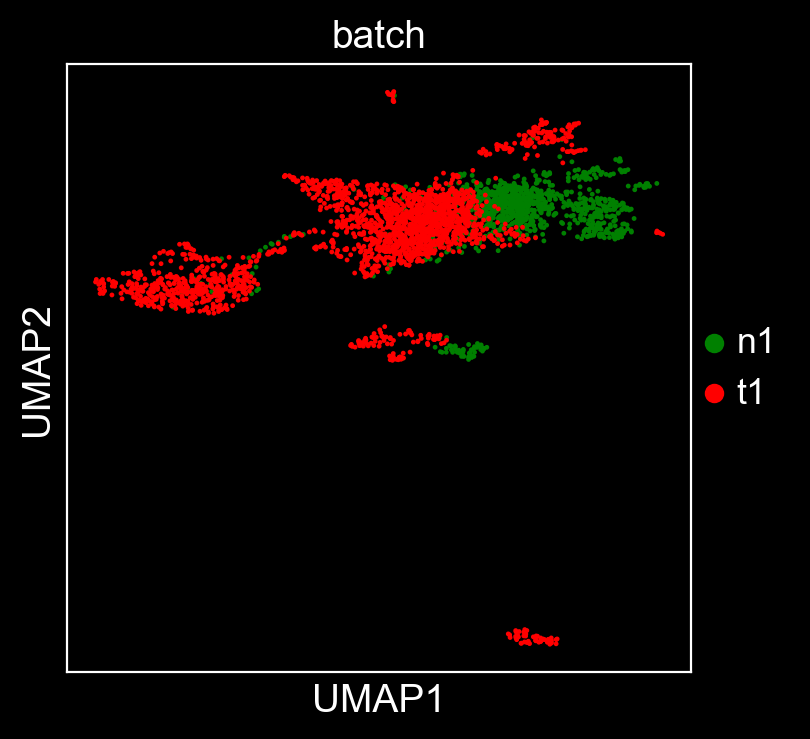

In [171]:
sc.pl.umap(dl_adata, color=['batch'], size=12, palette=['green','red'], save=True)

saving figure to file ./figures/umap.pdf


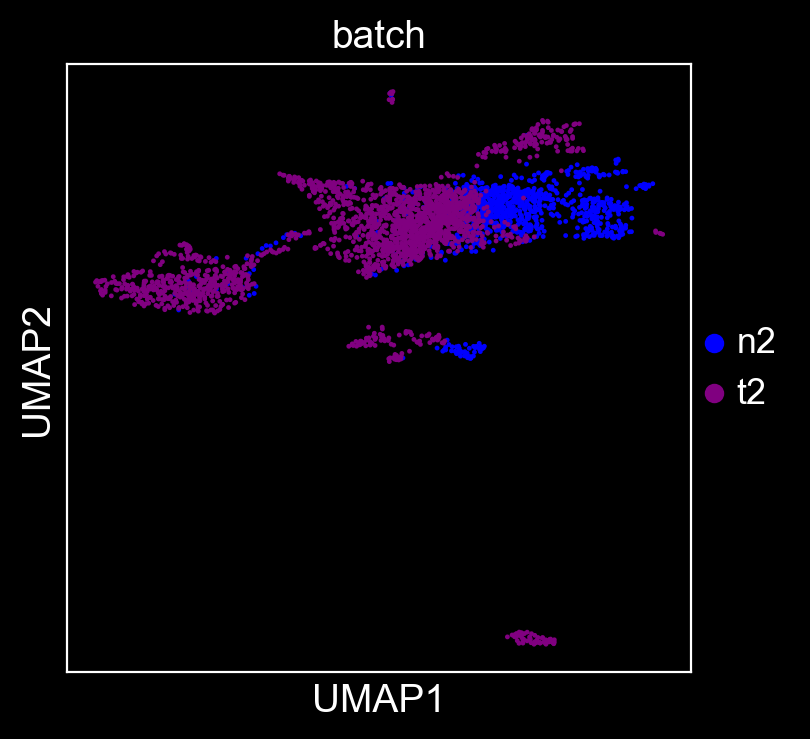

In [174]:
sc.pl.umap(sl_adata, color=['batch'], size=12, palette=['blue','purple'], save=True)

saving figure to file ./figures/umap.pdf


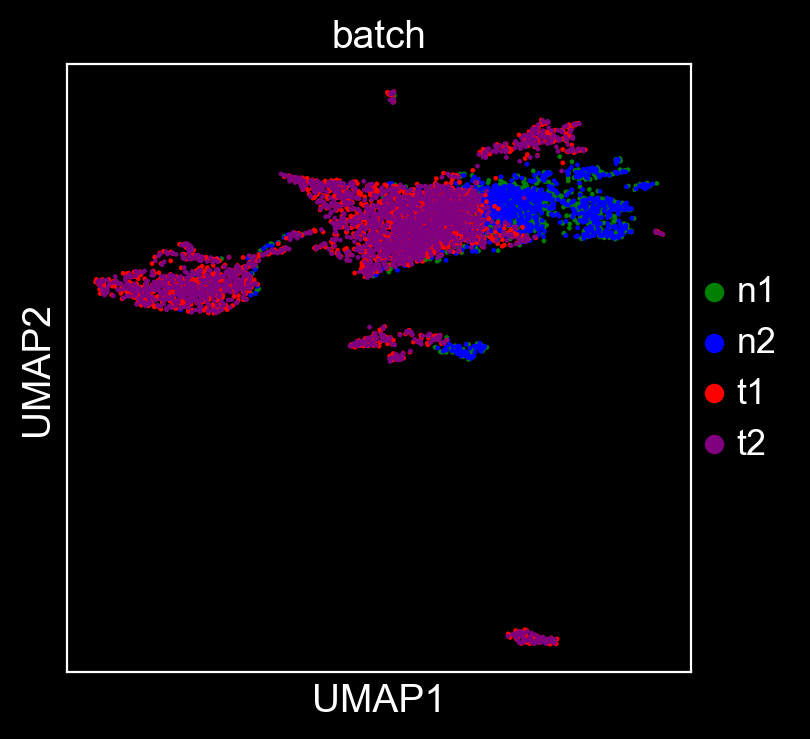

In [177]:
sc.pl.umap(adata, color=['batch'], size=12, palette=['green','blue','red','purple'], save=True)

saving figure to file ./figures/umap.pdf


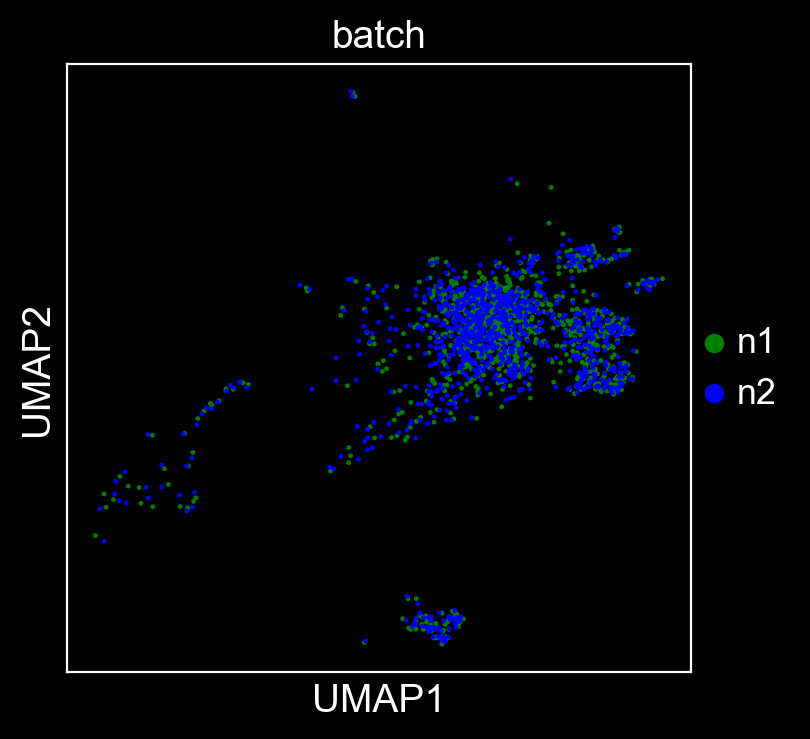

In [181]:
sc.pl.umap(nc_adata, color=['batch'], size=12, palette=['green','blue'], save=True)

saving figure to file ./figures/umap.pdf


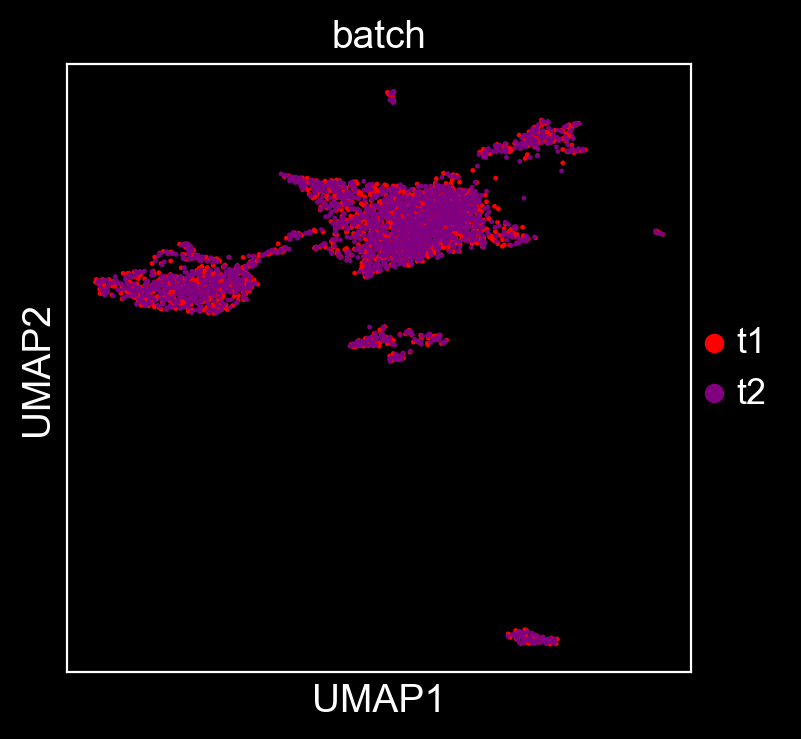

In [185]:
sc.pl.umap(tc_adata, color=['batch'], size=12, palette=['red','purple'], save=True)

saving figure to file ./figures/umap.pdf


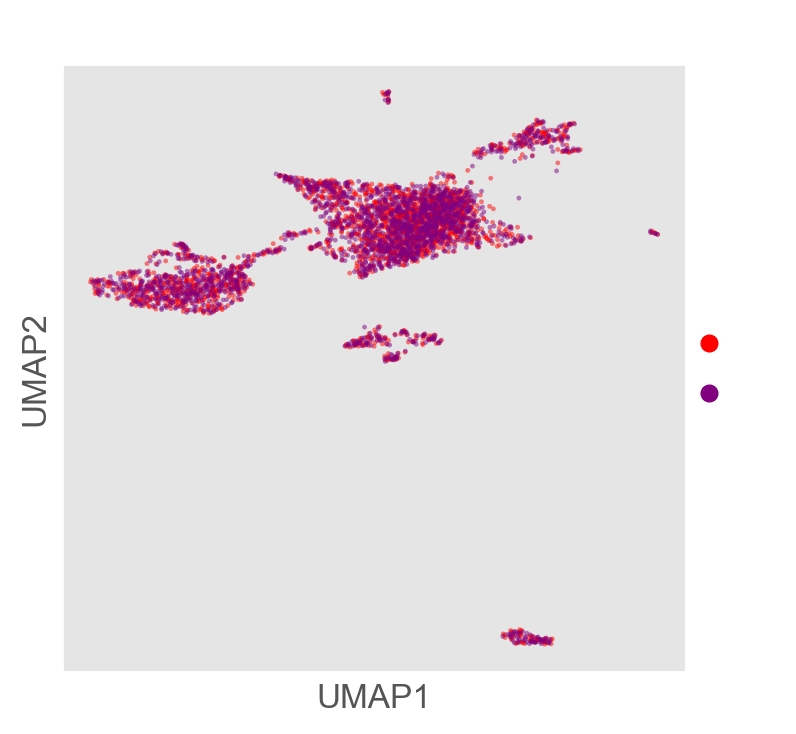

In [184]:
with plt.style.context('ggplot'):
    sc.pl.umap(tc_adata, color=['batch'], size=12, palette=['red','purple'], alpha=0.5, save=True)

saving figure to file ./figures/umap.pdf


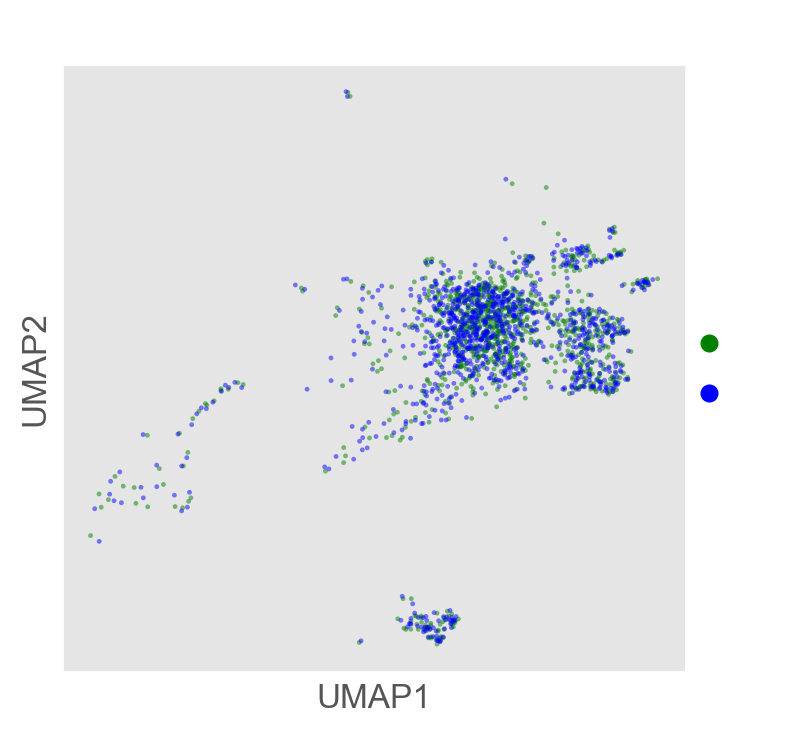

In [186]:
with plt.style.context('ggplot'):
    sc.pl.umap(nc_adata, color=['batch'], size=12, palette=['green','blue'], alpha=0.5, save=True)

In [254]:
print(adata.obs.index[-5:])

Index(['GGTGTTAGTAAGAGAG-1-t2', 'CAACTAGTCACTGGGC-1-t2',
       'AAAGATGAGGATGGTC-1-t2', 'CATCAGAAGCCGATTT-1-t2',
       'TGCGGGTCATCTACGA-1-t2'],
      dtype='object')


In [311]:
#to add a column to pandas DataFrame, need to be indexed the same way as the df!
cell_barcode = pd.Series(adata.obs.index, index=adata.obs.index).apply(lambda x: x[:-5]).astype('category')

In [312]:
#remove the batch identifing tags of the data indeces in order to correlated gene expression of the same cells sequenced in two and ingled lane
adata.obs.insert(loc=0, column='cell_bc', value=cell_barcode)
adata.obs.tail()

cell_bc batch  n_genes_by_counts  \
TGCTACCCAATTGCTG-1-t2  TGCTACCCAATTGCTG    t2                407   
CTGATAGTCGGTTCGG-1-t2  CTGATAGTCGGTTCGG    t2                381   
GGTGCGTCAGCCTGTG-1-t2  GGTGCGTCAGCCTGTG    t2                470   
GTGAAGGGTCATGCCG-1-t2  GTGAAGGGTCATGCCG    t2                479   
ATGCGATAGAGCCTAG-1-t2  ATGCGATAGAGCCTAG    t2                674   

                       log1p_n_genes_by_counts  total_counts  \
TGCTACCCAATTGCTG-1-t2                 6.011267         675.0   
CTGATAGTCGGTTCGG-1-t2                 5.945421         719.0   
GGTGCGTCAGCCTGTG-1-t2                 6.154858         769.0   
GTGAAGGGTCATGCCG-1-t2                 6.173786         867.0   
ATGCGATAGAGCCTAG-1-t2                 6.514713        1689.0   

                       log1p_total_counts  pct_counts_in_top_50_genes  \
TGCTACCCAATTGCTG-1-t2            6.516193                   39.703704   
CTGATAGTCGGTTCGG-1-t2            6.579251                   49.235049   
GGTGCGTCAGCCTGTG-1-t2            6.646390                   35.110533   
GTGAAGGGTCATGCCG-1-t2            6.766191                   40.023068   
ATGCGATAGAGCCTAG-1-t2            7.432484                   45.707519   

                       pct_counts_in_top_100_genes  \
TGCTACCCAATTGCTG-1-t2                    54.518519   
CTGATAGTCGGTTCGG-1-t2                    60.917942   
GGTGCGTCAGCCTGTG-1-t2                    48.894668   
GTGAAGGGTCATGCCG-1-t2                    53.287197   
ATGCGATAGAGCCTAG-1-t2                    58.140912   

                       pct_counts_in_top_200_genes  \
TGCTACCCAATTGCTG-1-t2                    69.333333   
CTGATAGTCGGTTCGG-1-t2                    74.826147   
GGTGCGTCAGCCTGTG-1-t2                    64.889467   
GTGAAGGGTCATGCCG-1-t2                    67.820069   
ATGCGATAGAGCCTAG-1-t2                    71.758437   

                       pct_counts_in_top_500_genes  total_counts_mito  \
TGCTACCCAATTGCTG-1-t2                   100.000000               28.0   
CTGATAGTCGGTTCGG-1-t2                   100.000000                4.0   
GGTGCGTCAGCCTGTG-1-t2                   100.000000               22.0   
GTGAAGGGTCATGCCG-1-t2                   100.000000               13.0   
ATGCGATAGAGCCTAG-1-t2                    89.698046               10.0   

                       log1p_total_counts_mito  pct_counts_mito  n_counts  \
TGCTACCCAATTGCTG-1-t2                 3.367296         4.148148     670.0   
CTGATAGTCGGTTCGG-1-t2                 1.609438         0.556328     708.0   
GGTGCGTCAGCCTGTG-1-t2                 3.135494         2.860858     768.0   
GTGAAGGGTCATGCCG-1-t2                 2.639057         1.499423     865.0   
ATGCGATAGAGCCTAG-1-t2                 2.397895         0.592066    1689.0   

                      louvain  
TGCTACCCAATTGCTG-1-t2       2  
CTGATAGTCGGTTCGG-1-t2      15  
GGTGCGTCAGCCTGTG-1-t2       2  
GTGAAGGGTCATGCCG-1-t2       0  
ATGCGATAGAGCCTAG-1-t2       7

In [315]:
print(sum(adata.obs.batch == 'n1'))
print(sum(adata.obs.batch == 't1'))

991
2092


In [317]:
#common cells after quality control
print(len(list(set(adata[adata.obs.batch == 'n1'].obs.cell_bc).intersection(set(adata[adata.obs.batch == 'n2'].obs.cell_bc)))))
#common cells after quality control
print(len(list(set(adata[adata.obs.batch == 't1'].obs.cell_bc).intersection(set(adata[adata.obs.batch == 't2'].obs.cell_bc)))))

969
2089


In [321]:
np.corrcoef(adata.X[0,:], adata.X[991,:])

array([[1.        , 0.80906454],
       [0.80906454, 1.        ]])

In [322]:
from scipy.stats.stats import pearsonr   
pearsonr(adata.X[0,:], adata.X[991,:])

(0.8090646, 0.0)

In [318]:
nc_common = list(set(adata[adata.obs.batch == 'n1'].obs.cell_bc).intersection(set(adata[adata.obs.batch == 'n2'].obs.cell_bc)))
tc_common = list(set(adata[adata.obs.batch == 't1'].obs.cell_bc).intersection(set(adata[adata.obs.batch == 't2'].obs.cell_bc)))

In [320]:
df=adata.to_df()

In [321]:
n_str1='-1-n1'
n_str2='-1-n2'
t_str1='-1-t1'
t_str2='-1-t2'
print(len([s + n_str1 for s in nc_common] + [s  + n_str2 for s in nc_common]))
print(len([s + t_str1 for s in tc_common] + [s  + t_str2 for s in tc_common]))

1938
4178


In [322]:
for i in tc_common[:5]:
    print(df.loc[[i+t_str1,i+t_str2]].index)
    print(round(df.loc[i+t_str1].corr(df.loc[i+t_str2]),2))

Index(['TATGCCCAGAATGTTG-1-t1', 'TATGCCCAGAATGTTG-1-t2'], dtype='object')
0.75
Index(['AAGGAGCTCAATAAGG-1-t1', 'AAGGAGCTCAATAAGG-1-t2'], dtype='object')
0.75
Index(['AAAGTAGCACCGAAAG-1-t1', 'AAAGTAGCACCGAAAG-1-t2'], dtype='object')
0.7
Index(['ACTATCTTCCTTGGTC-1-t1', 'ACTATCTTCCTTGGTC-1-t2'], dtype='object')
0.76
Index(['GTCGTAAGTTCAACCA-1-t1', 'GTCGTAAGTTCAACCA-1-t2'], dtype='object')
0.78


In [329]:
#find the correlation vectors between the gene expression of same barcode in double and single lane experiment; index by cell barcode
corr_nc = pd.Series([])
for i in nc_common:
    corr_nc.loc[i] = round(df.loc[i + n_str1].corr(df.loc[i + n_str2]), 2)

corr_tc = pd.Series([])
for i in tc_common:
    corr_tc.loc[i] = round(df.loc[i + t_str1].corr(df.loc[i + t_str2]), 2)    

In [325]:
print(len(corr_nc))
print(len(corr_tc))

969
2089


In [326]:
corr_nc.describe()

count    969.000000
mean       0.690083
std        0.158223
min        0.080000
25%        0.590000
50%        0.710000
75%        0.820000
max        0.960000
dtype: float64

In [331]:
print(corr_nc.median())
print(corr_tc.median())

0.71
0.79


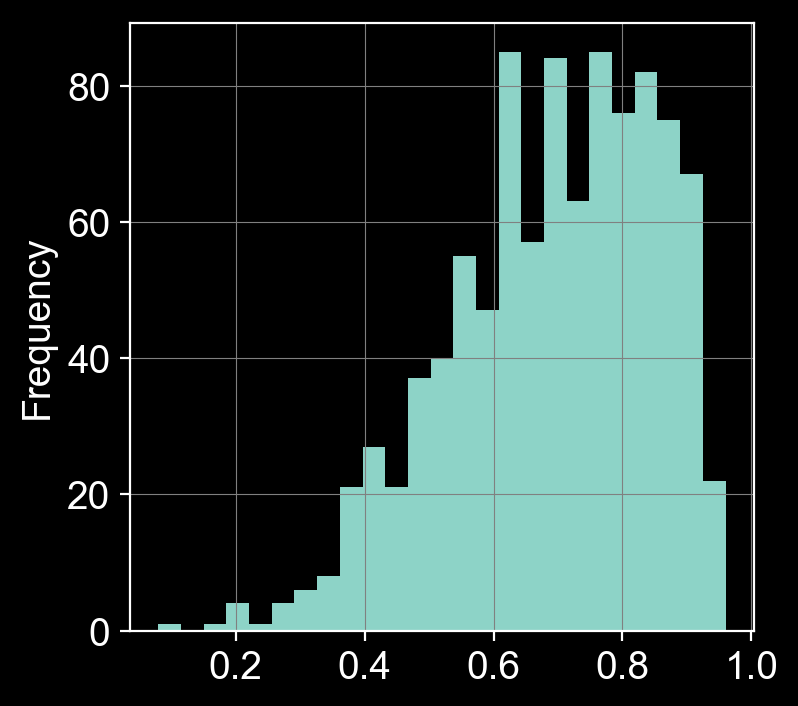

In [336]:
corr_nc.plot.hist(bins=25)

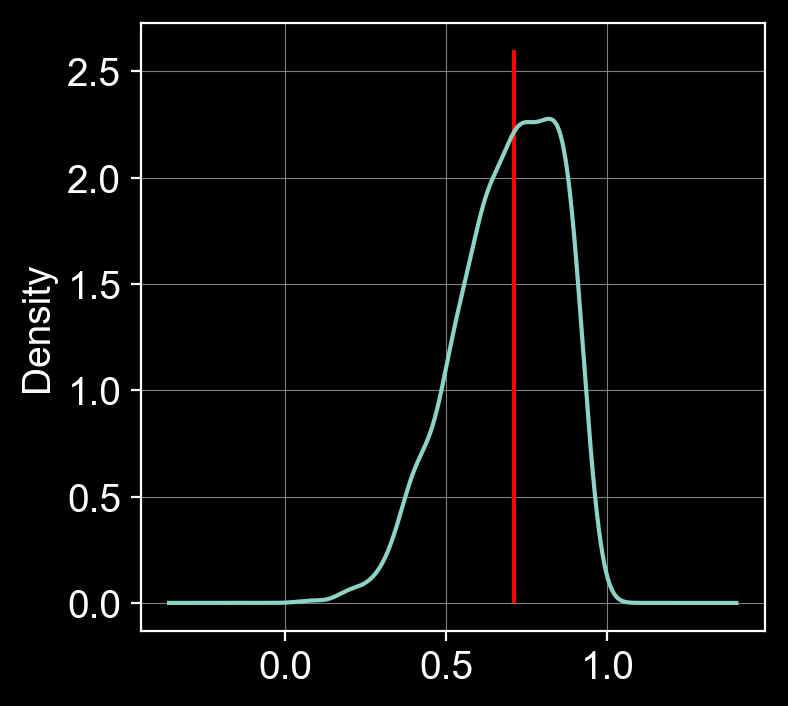

In [335]:
corr_nc.plot.kde()
plt.vlines(x=corr_nc.median(), ymin=0, ymax=2.6, colors='red', label='median of'+ str(corr_nc.median()))

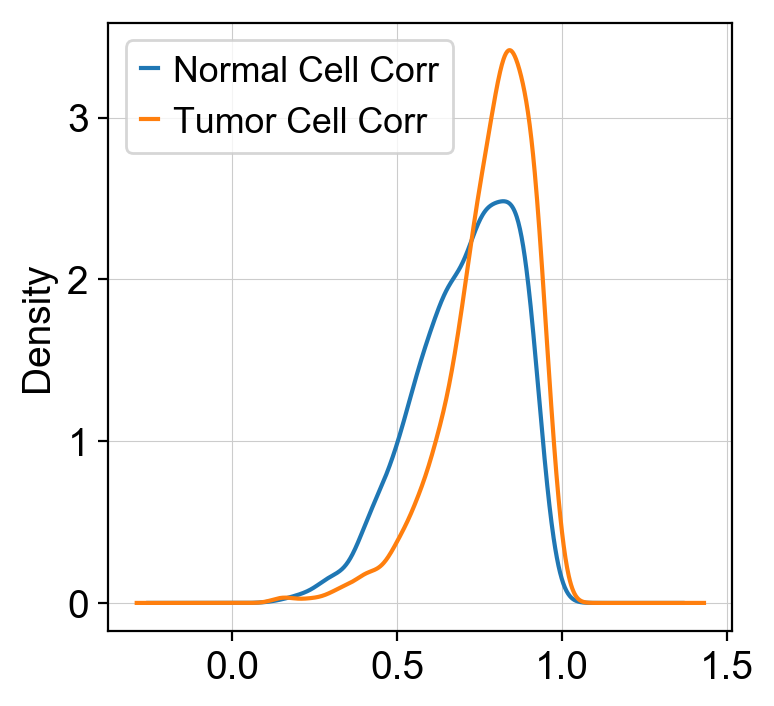

In [196]:
corr_df.plot.kde()

In [338]:
trace_1 = go.Histogram(x=corr_nc,
                       name='normal cells corr',
                       xbins=dict(start=0, end=1, size=0.025))
                       #opacity = 0.5)

trace_2 = go.Histogram(x=corr_tc,
                       name='tumor cells corr',
                       xbins=dict(start=0, end=1, size=0.025))
                       #opacity = 0.5)
    
data = [trace_1, trace_2]
layout = go.Layout(title = 'Hist of correlations of cell gene expression between seq runs',
                   bargap = 0.001)
                   #bargroupgap = 0.001
                   #barmode='overlay'

plotly.offline.iplot(dict(data = data, 
                          layout = layout))

In [339]:
hist_data = [corr_nc.values, 
             corr_tc.values]

group_labels=['normal cells corr', 'tumor cells corr']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0.025, show_hist=False)

plotly.offline.iplot(fig, filename='CellCorrs')

In [341]:
2089/2148

0.9725325884543762

In [342]:
969/1210

0.8008264462809918

In [344]:
1146/1210

0.947107438016529

In [345]:
2101/2148

0.9781191806331471